# CREDIT LOAN DEFAULT PREDICTION

# import the necessary libraries and dataset.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
d1=pd.read_excel('C:/Users/91977/Desktop/Credit loan/Data Dictionary.xlsx')
d1

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [2]:
train_data=pd.read_csv('C:/Users/91977/Desktop/Credit loan/Loan Default Data.csv')
train_data.tail(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233153,630213,75751,116009,66.81,77,22186,86,2299,18-02-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


# lets explore our data's rows and columns(R,C)

In [3]:
train_data.shape

(233154, 41)

# LETS VISUALIZE THE DATA

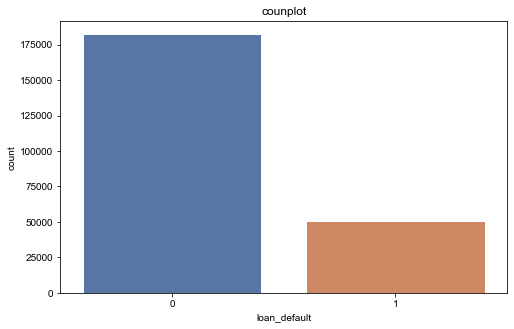

In [4]:
plt.figure(figsize=(8,5))
plt.title('counplot')
sns.set(style='darkgrid')
sns.countplot(x='loan_default',data=train_data)

Text(0.5, 1.0, 'SCATTER PLOT')

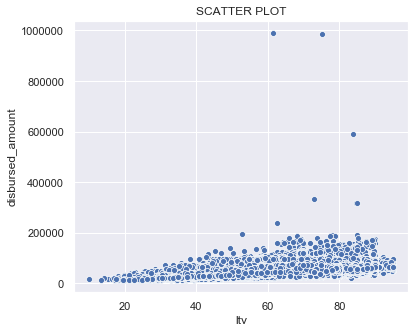

In [5]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='ltv', y='disbursed_amount',data=train_data)
plt.title('SCATTER PLOT')

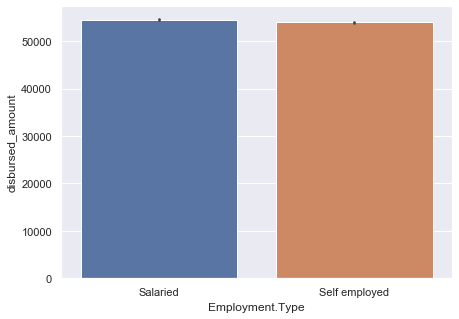

In [6]:
plt.figure(figsize=(7,5))
sns.barplot(x='Employment.Type', y='disbursed_amount',data=train_data)

(array([2.32546e+05, 6.01000e+02, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 13320. , 111045.2, 208770.4, 306495.6, 404220.8, 501946. ,
        599671.2, 697396.4, 795121.6, 892846.8, 990572. ]),
 <a list of 10 Patch objects>)

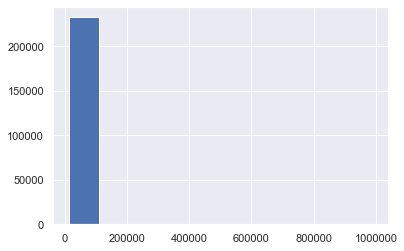

In [7]:
plt.hist(train_data['disbursed_amount'])

# here is the correlation of inputs with the ouput

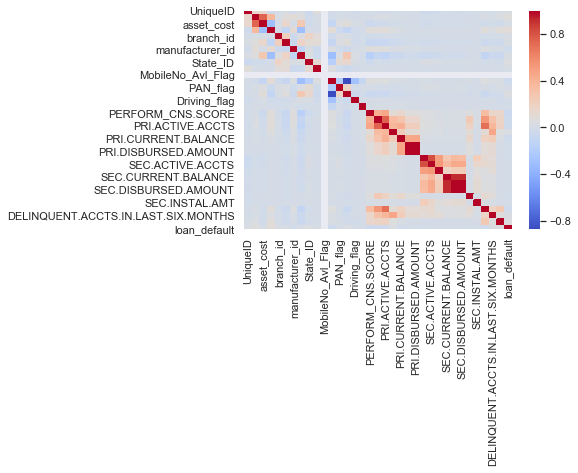

In [8]:
sns.heatmap(train_data.corr(), cmap='coolwarm')

In [9]:
train_data.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,-0.006537,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657


# checking missing values if any

In [10]:
train_data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

# counting the no of labels in Employment.Type

In [11]:
train_data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

# treating the 'Employment.Type' by replacing its NAN values with label Salaried as we see in above code we have less people of salaried

In [12]:
train_data['Employment.Type'].fillna('Salaried', inplace=True)

# checking again it has been treated or not 

In [13]:
train_data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

# looking further for the outliers in below code, we always check outliers in continous inputs only.. and never treat the output

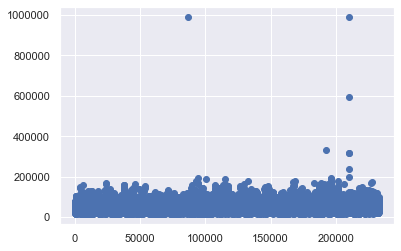

In [14]:
import matplotlib.pyplot as plt
plt.scatter(train_data['disbursed_amount'].index,train_data['disbursed_amount'])

# though we get the outliers in above column then we'll treate them in below code

In [15]:
from scipy import stats
import numpy as np
li=list(train_data['disbursed_amount'][np.abs(stats.zscore(train_data['disbursed_amount']))>5].index)

In [16]:
train_data['disbursed_amount'][li]=train_data.drop(li)['disbursed_amount'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# what we have done in above code is: storing all the outliers in li and dropping by the mean of it.

# checking again if it has been treated or not

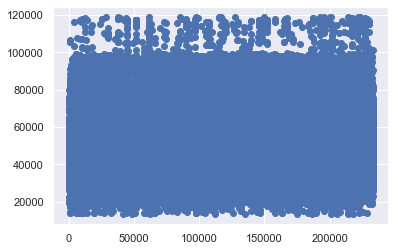

In [17]:
plt.scatter(train_data['disbursed_amount'].index,train_data['disbursed_amount'])

# checking outliers for another input

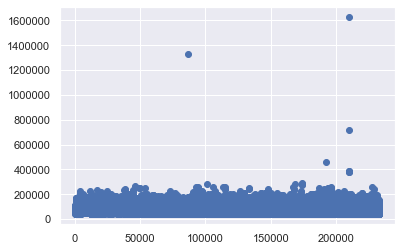

In [18]:
plt.scatter(train_data['asset_cost'].index,train_data['asset_cost'])

# treating them same as above

In [19]:
li=list(train_data['asset_cost'][np.abs(stats.zscore(train_data['asset_cost']))>1].index)

In [20]:
train_data['asset_cost'][li]=train_data.drop(li)['asset_cost'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


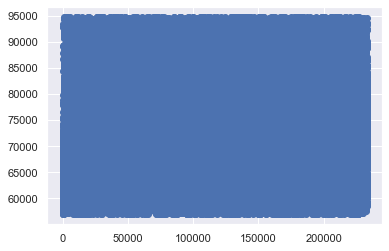

In [21]:
plt.scatter(train_data['asset_cost'].index,train_data['asset_cost'])

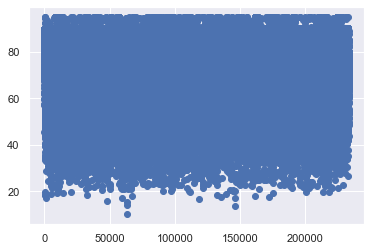

In [22]:
plt.scatter(train_data['ltv'].index,train_data['ltv'])

# we are dropping the below columns they do not have much importance with the output 

In [23]:
train_data.drop(['UniqueID','Current_pincode_ID','Date.of.Birth'],axis=1,inplace=True)

In [24]:
train_data.columns
for i in train_data.columns:
    print(train_data[i].dtype)

float64
float64
float64
int64
int64
int64
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
object
int64
int64


In [25]:
train_data.drop(['PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace = True)

In [26]:
train_data['AVERAGE.ACCT.AGE']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          0yrs 8mon
4          0yrs 0mon
             ...    
233149     1yrs 9mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: AVERAGE.ACCT.AGE, Length: 233154, dtype: object

# using label encoder, it will make our data in numeric form or it will convert strings into numbers 

In [27]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
#alphabetically

for i in train_data.columns:
    if isinstance(train_data[i][0], str):
            train_data[i] = encoder.fit_transform(train_data[i])

# below are thw columns correaltion strength is very low so we can drop it out 

In [28]:
train_data.drop(['branch_id','supplier_id','manufacturer_id',
                     'Employment.Type','DisbursalDate','State_ID',
                     'Employee_code_ID','NO.OF_INQUIRIES','SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS'],axis=1,inplace=True)


In [29]:
train_data.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,loan_default
0,50578.0,58400.0,89.55,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145.0,65550.0,73.23,1,1,0,0,0,0,598,...,0,0,0,0,0,1991,1,83,130,1
2,53278.0,61360.0,89.63,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513.0,66113.0,88.48,1,1,0,0,0,0,305,...,0,0,0,0,0,31,0,10,133,1
4,52378.0,60300.0,88.39,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Spllitting data into X and y

In [30]:
X=train_data.drop('loan_default',axis=1)
y=train_data['loan_default']

# checking multicollinearity(VIF) in inputs

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_vif = add_constant(X)
pd.Series([variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])], index=X_vif.columns)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


disbursed_amount                          1.477913
asset_cost                                1.262810
ltv                                       1.351231
MobileNo_Avl_Flag                       233.860140
Aadhar_flag                               7.947762
PAN_flag                                  1.056286
VoterID_flag                              7.135251
Driving_flag                              1.845035
Passport_flag                             1.080449
PERFORM_CNS.SCORE                         1.913918
PRI.NO.OF.ACCTS                           2.584510
PRI.ACTIVE.ACCTS                          2.924590
PRI.OVERDUE.ACCTS                         1.534821
PRI.CURRENT.BALANCE                       1.539606
PRI.SANCTIONED.AMOUNT                   406.944129
PRI.DISBURSED.AMOUNT                    409.554677
SEC.NO.OF.ACCTS                           3.285786
SEC.ACTIVE.ACCTS                          3.782981
SEC.OVERDUE.ACCTS                         1.425165
SEC.CURRENT.BALANCE            

# FEATURE SELECTION PROCESS

# checking the relationship of inputs(categorical) to the output(categorical) applying CHI-SQUARE test.

In [32]:
col=X.columns
col=col.drop(['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',
          'CREDIT.HISTORY.LENGTH','AVERAGE.ACCT.AGE'])

import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in col:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100

Significance.sort_values()

MobileNo_Avl_Flag                        0.000000
PRI.DISBURSED.AMOUNT                     0.000000
PRI.SANCTIONED.AMOUNT                    0.000000
PRI.CURRENT.BALANCE                      0.000000
SEC.DISBURSED.AMOUNT                     0.000111
SEC.SANCTIONED.AMOUNT                    0.000178
SEC.CURRENT.BALANCE                      0.009151
SEC.OVERDUE.ACCTS                       41.938997
PAN_flag                                67.222566
SEC.NO.OF.ACCTS                         94.081591
SEC.ACTIVE.ACCTS                        97.157867
Driving_flag                            99.479871
Passport_flag                           99.970120
PRI.NO.OF.ACCTS                        100.000000
PRI.ACTIVE.ACCTS                       100.000000
PRI.OVERDUE.ACCTS                      100.000000
Aadhar_flag                            100.000000
VoterID_flag                           100.000000
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    100.000000
dtype: float64

# below code shows the columns(continous) howmuch they are reated with the target(categorical) 

In [33]:
colm=['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',
          'CREDIT.HISTORY.LENGTH','AVERAGE.ACCT.AGE']
from scipy import stats
pd.Series([stats.f_oneway(X[i],y)for i in colm],index=colm)

disbursed_amount           (4589992.09998681, 0.0)
asset_cost                (22918253.85872454, 0.0)
ltv                       (9854228.400645033, 0.0)
PERFORM_CNS.SCORE          (170365.145670287, 0.0)
PRIMARY.INSTAL.AMT       (1747.6999069086194, 0.0)
CREDIT.HISTORY.LENGTH    (121324.46461421307, 0.0)
AVERAGE.ACCT.AGE          (95937.30609937855, 0.0)
dtype: object

# importing train_test_split, logistic regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.7)

In [35]:
log= LogisticRegression()
log.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
log.score(X_train, y_train)*100

78.27895805335544

In [37]:
log.score(X_test,y_test)*100

78.29089260330376

# loading the test_data

In [38]:
test_data=pd.read_csv('C:/Users/91977/Desktop/Credit loan/Loan Default Test Data.csv')

# lets have the shape of the data

In [39]:
test_data.shape

(112392, 40)

# here is the column named Employment.Type which has the missing values

In [40]:
test_data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [41]:
test_data['Employment.Type'].value_counts()

Self employed    59794
Salaried         49155
Name: Employment.Type, dtype: int64

# In below code the NAN values are treated by filling the Salaried label in it.

In [42]:
test_data['Employment.Type'].fillna('Self employed',inplace=True)

# lets check for outliers

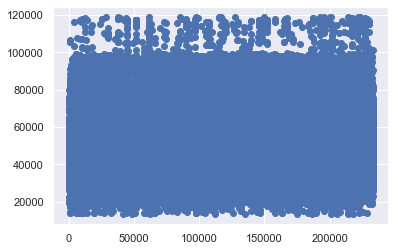

In [43]:
import matplotlib.pyplot as plt
plt.scatter(train_data['disbursed_amount'].index,train_data['disbursed_amount'])

In [44]:
from scipy import stats
import numpy as np
li=list(train_data['disbursed_amount'][np.abs(stats.zscore(train_data['disbursed_amount']))>5].index)

In [45]:
train_data['disbursed_amount'][li]=train_data.drop(li)['disbursed_amount'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# the outliers are treated as same as above in train_data

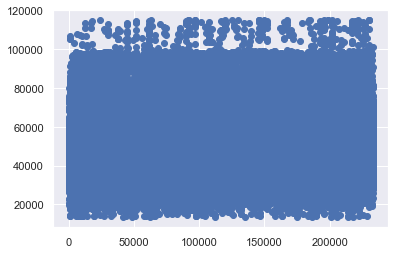

In [46]:
plt.scatter(train_data['disbursed_amount'].index,train_data['disbursed_amount'])

# checking outliers in another column 

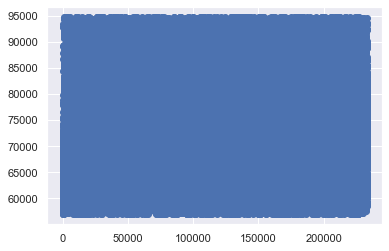

In [47]:
plt.scatter(train_data['asset_cost'].index,train_data['asset_cost'])

In [48]:
li=list(train_data['asset_cost'][np.abs(stats.zscore(train_data['asset_cost']))>1].index)

In [49]:
train_data['asset_cost'][li]=train_data.drop(li)['asset_cost'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# again checking outliers in another continous column

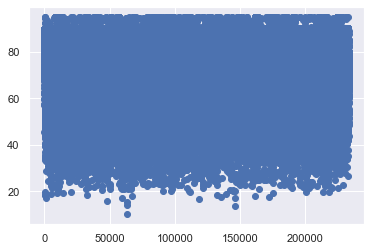

In [50]:
plt.scatter(train_data['ltv'].index,train_data['ltv'])

# dropping the below columns from data as they are not so much important for the output

In [51]:
test_data.drop(['UniqueID','Current_pincode_ID','Date.of.Birth'],axis=1,inplace=True)

# Label Encoder for preprocessing data

In [52]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
#alphabetically

for i in test_data.columns:
    if isinstance(test_data[i][0], str):
            test_data[i] = encoder.fit_transform(test_data[i])

# feature selection by dropping these columns

In [53]:
test_data.drop(['branch_id','supplier_id','manufacturer_id',
                     'Employment.Type','DisbursalDate','State_ID',
                     'Employee_code_ID','NO.OF_INQUIRIES','SEC.INSTAL.AMT',
                'NEW.ACCTS.IN.LAST.SIX.MONTHS','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)

In [54]:
test_data

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE
0,53478,63558,86.54,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55513,63163,89.45,1,1,0,0,0,0,749,...,48780,0,0,0,0,0,0,5605,0,10
2,65282,84320,79.93,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46905,63896,76.58,1,1,0,0,0,0,14,...,255000,0,0,0,0,0,0,0,0,87
4,51428,63896,86.08,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,44875,72509,67.58,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112388,53549,72509,78.61,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112389,55243,72509,81.37,1,1,0,0,0,0,785,...,0,0,0,0,0,0,0,0,0,105
112390,55243,72509,81.37,1,1,0,0,0,0,714,...,100000,0,0,0,0,0,0,0,1,5


In [55]:
import numpy as np
test_data.shape

(112392, 26)

# making predictions 

In [56]:
prediction = log.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
import pandas as pd
output=pd.DataFrame(prediction,columns=['loan_default'])

# here is our output

In [58]:
output.head(5)

,loan_default
0,0
1,0
2,0
3,0
4,0


In [59]:
for i in col:
    print(train_data.groupby(i).mean()['loan_default'])

MobileNo_Avl_Flag
1    0.217071
Name: loan_default, dtype: float64
Aadhar_flag
0    0.256406
1    0.209597
Name: loan_default, dtype: float64
PAN_flag
0    0.216830
1    0.220022
Name: loan_default, dtype: float64
VoterID_flag
0    0.209646
1    0.260875
Name: loan_default, dtype: float64
Driving_flag
0    0.217441
1    0.201513
Name: loan_default, dtype: float64
Passport_flag
0    0.217216
1    0.149194
Name: loan_default, dtype: float64
PRI.NO.OF.ACCTS
0      0.231313
1      0.221196
2      0.214770
3      0.202689
4      0.191784
         ...   
148    0.500000
194    0.000000
271    0.000000
354    0.000000
453    1.000000
Name: loan_default, Length: 108, dtype: float64
PRI.ACTIVE.ACCTS
0      0.226623
1      0.218333
2      0.209615
3      0.202070
4      0.184316
5      0.168428
6      0.171090
7      0.147632
8      0.144759
9      0.133598
10     0.133981
11     0.133333
12     0.113537
13     0.129944
14     0.125000
15     0.135417
16     0.113208
17     0.185185
18     0.060

# below code shows the loan default graph with the columns (OPTIONAL)

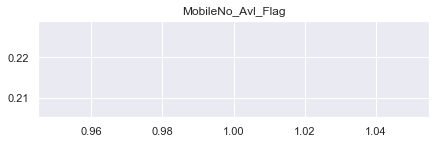

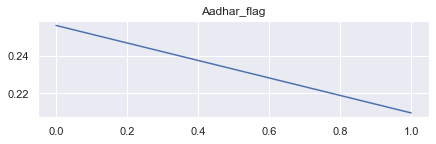

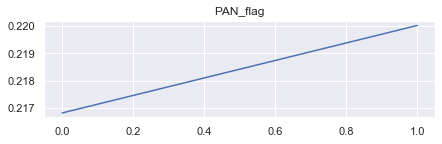

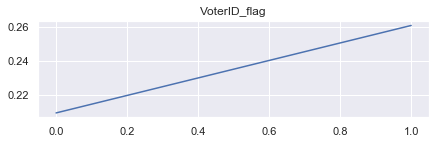

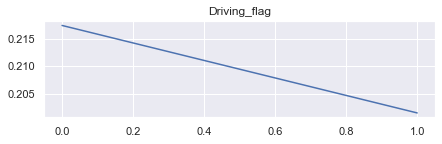

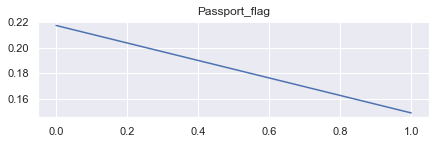

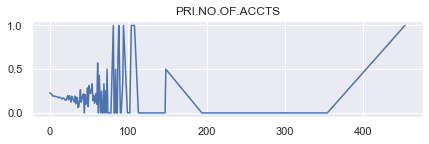

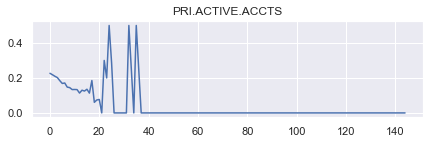

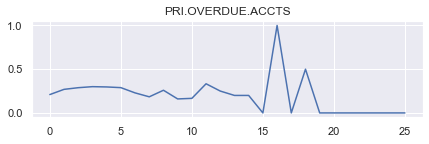

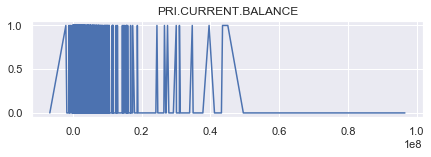

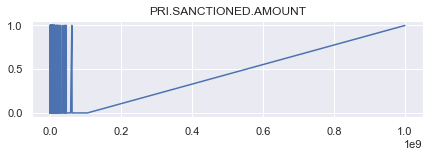

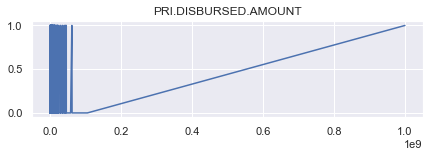

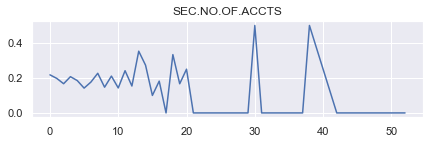

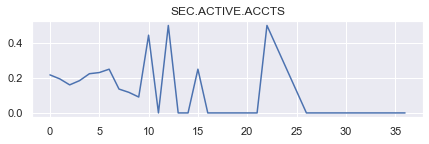

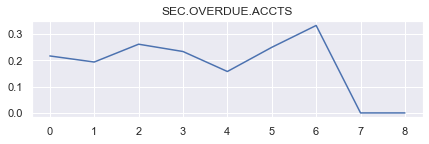

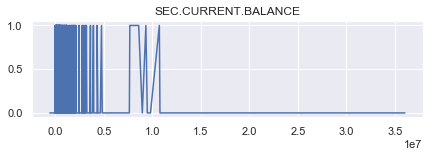

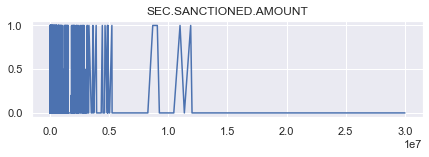

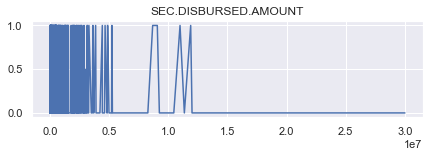

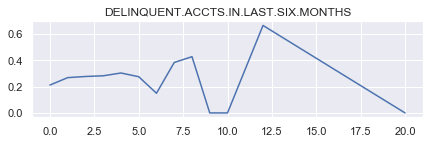

In [60]:
for i ,j in zip(col,range(1,len(col)+1)):
    plt.figure(figsize=(7,40))
    plt.subplot(len(col),1,j)
    plt.plot(train_data.groupby(i).mean()['loan_default'].index,train_data.groupby(i).mean()['loan_default'])
    plt.title(i)